In [11]:
import boto3
import io
from PIL import Image,  ImageFont, ImageDraw 
from pprint import pprint
import datetime

s3 = boto3.resource('s3')
rekognition = boto3.client('rekognition', region_name='us-east-2')
dynamodb = boto3.client('dynamodb', region_name='us-east-2')

bucket = 'face-recognition-shehroozsattar-01021993'
tableName = 'face-recognition-shehroozsattar-01021993'
collectionName = 'face-recognition-shehroozsattar-01021993'


In [2]:
# Get list of objects for indexing
imagesTrain=[

('subject01_1_11zon.jpg','Alex'),
('subject01_2_11zon.jpg','Alex'),
('subject01_3_11zon.jpg','Alex'),
('subject01_4_11zon.jpg','Alex'),
('subject01_5_11zon.jpg','Alex'),
('subject01_6_11zon.jpg','Alex'),
('subject01_7_11zon.jpg','Alex'),
('subject01_8_11zon.jpg','Alex'),
('subject01_9_11zon.jpg','Alex'),
('subject01_10_11zon.jpg','Alex'),
('subject01_11_11zon.jpg','Alex'),
('subject02_12_11zon.jpg','Bob'),
('subject02_13_11zon.jpg','Bob'),
('subject02_14_11zon.jpg','Bob'),
('subject02_15_11zon.jpg','Bob'),
('subject02_16_11zon.jpg','Bob'),
('subject02_17_11zon.jpg','Bob'),
('subject02_18_11zon.jpg','Bob'),
('subject02_19_11zon.jpg','Bob'),
('subject02_20_11zon.jpg','Bob'),
('subject02_21_11zon.jpg','Bob'),
('subject02_22_11zon.jpg','Bob'),
('subject03_23_11zon.jpg','Charlie'),
('subject03_24_11zon.jpg','Charlie'),
('subject03_25_11zon.jpg','Charlie'),
('subject03_26_11zon.jpg','Charlie'),
('subject03_27_11zon.jpg','Charlie'),
('subject03_28_11zon.jpg','Charlie'),
('subject03_29_11zon.jpg','Charlie'),
('subject03_30_11zon.jpg','Charlie'),
('subject03_31_11zon.jpg','Charlie'),
('subject03_32_11zon.jpg','Charlie'),
('subject03_33_11zon.jpg','Charlie'),
('subject04_34_11zon.jpg','Denis'),
('subject04_35_11zon.jpg','Denis'),
('subject04_36_11zon.jpg','Denis'),
('subject04_37_11zon.jpg','Denis'),
('subject04_38_11zon.jpg','Denis'),
('subject04_39_11zon.jpg','Denis'),
('subject04_40_11zon.jpg','Denis'),
('subject04_41_11zon.jpg','Denis'),
('subject04_42_11zon.jpg','Denis'),
('subject04_43_11zon.jpg','Denis'),
('subject04_44_11zon.jpg','Denis'),
('subject05_45_11zon.jpg','Ellie'),
('subject05_46_11zon.jpg','Ellie'),
('subject05_47_11zon.jpg','Ellie'),
('subject05_48_11zon.jpg','Ellie'),
('subject05_49_11zon.jpg','Ellie'),
('subject05_50_11zon.jpg','Ellie'),
('subject05_51_11zon.jpg','Ellie'),
('subject05_52_11zon.jpg','Ellie'),
('subject05_53_11zon.jpg','Ellie'),
('subject05_54_11zon.jpg','Ellie'),
('subject05_55_11zon.jpg','Ellie'),
('subject06_56_11zon.jpg','Ferry'),
('subject06_57_11zon.jpg','Ferry'),
('subject06_58_11zon.jpg','Ferry'),
('subject06_59_11zon.jpg','Ferry'),
('subject06_60_11zon.jpg','Ferry'),
('subject06_61_11zon.jpg','Ferry'),
('subject06_62_11zon.jpg','Ferry'),
('subject06_63_11zon.jpg','Ferry'),
('subject06_64_11zon.jpg','Ferry'),
('subject06_65_11zon.jpg','Ferry'),
('subject06_66_11zon.jpg','Ferry'),
('subject07_67_11zon.jpg','Garry'),
('subject07_68_11zon.jpg','Garry'),
('subject07_69_11zon.jpg','Garry'),
('subject07_70_11zon.jpg','Garry'),
('subject07_71_11zon.jpg','Garry'),
('subject07_72_11zon.jpg','Garry'),
('subject07_73_11zon.jpg','Garry'),
('subject07_74_11zon.jpg','Garry'),
('subject07_75_11zon.jpg','Garry'),
('subject07_76_11zon.jpg','Garry'),
('subject07_77_11zon.jpg','Garry'),
('subject08_78_11zon.jpg','Harry'),
('subject08_79_11zon.jpg','Harry'),
('subject08_80_11zon.jpg','Harry'),
('subject08_81_11zon.jpg','Harry'),
('subject08_82_11zon.jpg','Harry'),
('subject08_83_11zon.jpg','Harry'),
('subject08_84_11zon.jpg','Harry'),
('subject08_85_11zon.jpg','Harry'),
('subject08_86_11zon.jpg','Harry'),
('subject08_87_11zon.jpg','Harry'),
('subject08_88_11zon.jpg','Harry'),
('subject09_89_11zon.jpg','Irina'),
('subject09_90_11zon.jpg','Irina'),
('subject09_91_11zon.jpg','Irina'),
('subject09_92_11zon.jpg','Irina'),
('subject09_93_11zon.jpg','Irina'),
('subject09_94_11zon.jpg','Irina'),
('subject09_95_11zon.jpg','Irina'),
('subject09_96_11zon.jpg','Irina'),
('subject09_97_11zon.jpg','Irina'),
('subject09_98_11zon.jpg','Irina'),
('subject09_99_11zon.jpg','Irina'),
('subject10_100_11zon.jpg','Jerry'),
('subject10_101_11zon.jpg','Jerry'),
('subject10_102_11zon.jpg','Jerry'),
('subject10_103_11zon.jpg','Jerry'),
('subject10_104_11zon.jpg','Jerry'),
('subject10_105_11zon.jpg','Jerry'),
('subject10_106_11zon.jpg','Jerry'),
('subject10_107_11zon.jpg','Jerry'),
('subject10_108_11zon.jpg','Jerry'),
('subject10_109_11zon.jpg','Jerry'),
('subject10_110_11zon.jpg','Jerry'),
('subject11_111_11zon.jpg','Kim'),
('subject11_112_11zon.jpg','Kim'),
('subject11_113_11zon.jpg','Kim'),
('subject11_114_11zon.jpg','Kim'),
('subject11_115_11zon.jpg','Kim'),
('subject11_116_11zon.jpg','Kim'),
('subject11_117_11zon.jpg','Kim'),
('subject11_118_11zon.jpg','Kim'),
('subject11_119_11zon.jpg','Kim'),
('subject11_120_11zon.jpg','Kim'),
('subject11_121_11zon.jpg','Kim'),
('subject12_122_11zon.jpg','leo'),
('subject12_123_11zon.jpg','leo'),
('subject12_124_11zon.jpg','leo'),
('subject12_125_11zon.jpg','leo'),
('subject12_126_11zon.jpg','leo'),
('subject12_127_11zon.jpg','leo'),
('subject12_128_11zon.jpg','leo'),
('subject12_129_11zon.jpg','leo'),
('subject12_130_11zon.jpg','leo'),
('subject12_131_11zon.jpg','leo'),
('subject12_132_11zon.jpg','leo'),
('subject13_133_11zon.jpg','Manny'),
('subject13_134_11zon.jpg','Manny'),
('subject13_135_11zon.jpg','Manny'),
('subject13_136_11zon.jpg','Manny'),
('subject13_137_11zon.jpg','Manny'),
('subject13_138_11zon.jpg','Manny'),
('subject13_139_11zon.jpg','Manny'),
('subject13_140_11zon.jpg','Manny'),
('subject13_141_11zon.jpg','Manny'),
('subject13_142_11zon.jpg','Manny'),
('subject13_143_11zon.jpg','Manny'),
('subject14_144_11zon.jpg','Ned'),
('subject14_145_11zon.jpg','Ned'),
('subject14_146_11zon.jpg','Ned'),
('subject14_147_11zon.jpg','Ned'),
('subject14_148_11zon.jpg','Ned'),
('subject14_149_11zon.jpg','Ned'),
('subject14_150_11zon.jpg','Ned'),
('subject14_151_11zon.jpg','Ned'),
('subject14_152_11zon.jpg','Ned'),
('subject14_153_11zon.jpg','Ned'),
('subject14_154_11zon.jpg','Ned'),
('subject15_155_11zon.jpg','oxam'),
('subject15_156_11zon.jpg','oxam'),
('subject15_157_11zon.jpg','oxam'),
('subject15_158_11zon.jpg','oxam'),
('subject15_159_11zon.jpg','oxam'),
('subject15_160_11zon.jpg','oxam'),
('subject15_161_11zon.jpg','oxam'),
('subject15_162_11zon.jpg','oxam'),
('subject15_163_11zon.jpg','oxam'),
('subject15_164_11zon.jpg','oxam'),
('subject15_165_11zon.jpg','oxam'),
      ]

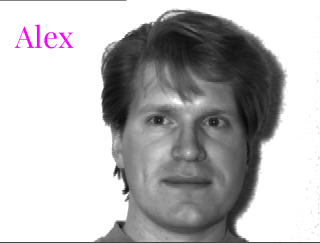

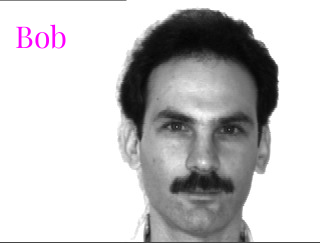

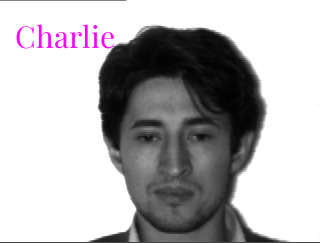

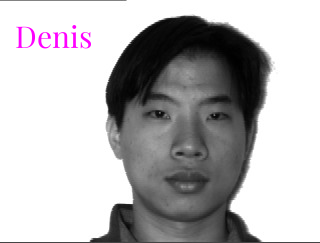

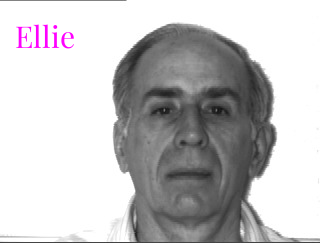

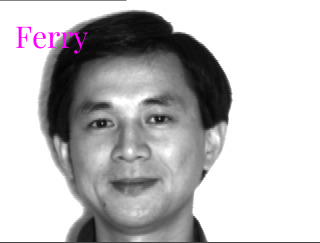

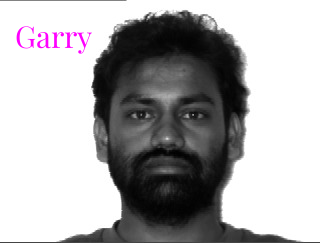

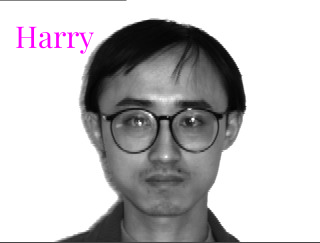

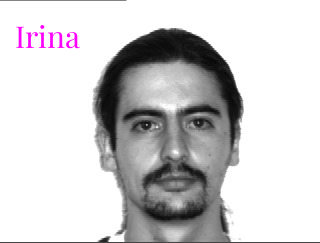

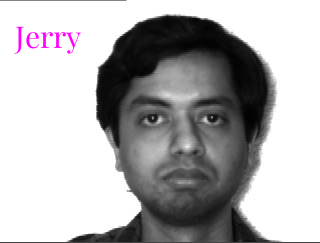

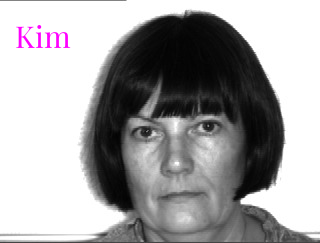

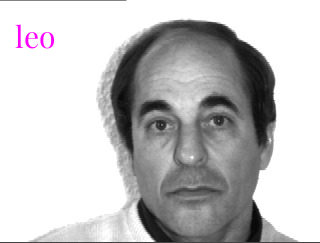

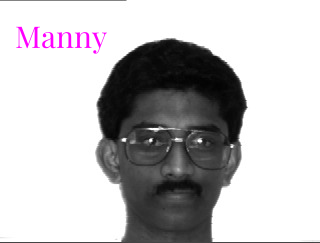

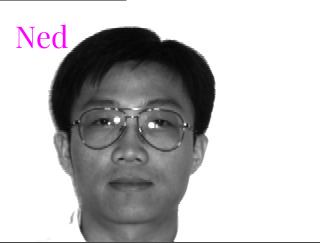

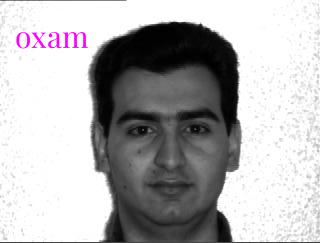

In [3]:
for image in imagesTrain[0::11]:
    my_image = Image.open('Images\\'+image[0])
    title_font = ImageFont.truetype('PlayfairDisplay-Regular.ttf', 30)
    title_text = image[1]
    image_editable = ImageDraw.Draw(my_image)
    image_editable.text((15,15), title_text, (255, 0, 255), font=title_font)
    display(my_image)


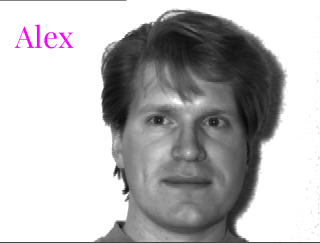

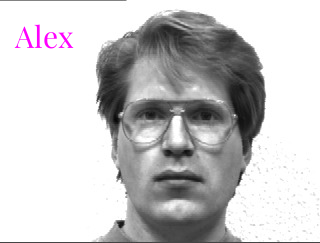

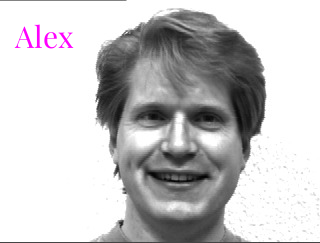

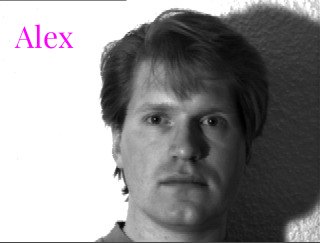

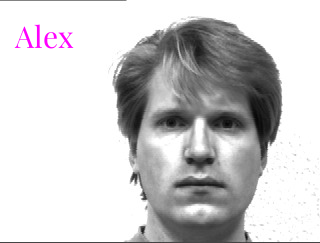

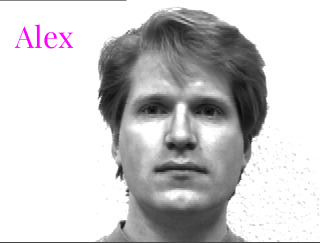

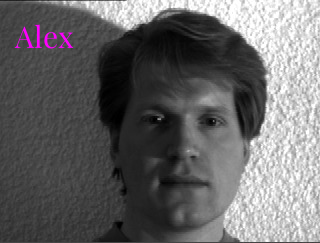

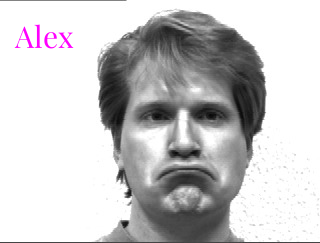

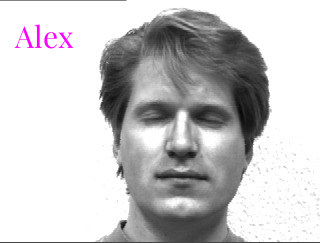

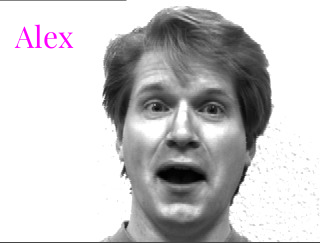

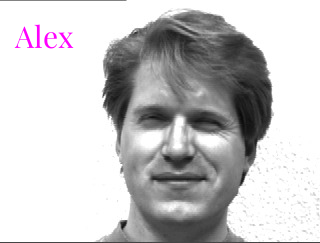

In [4]:
for image in imagesTrain[0:11]:
    my_image = Image.open('Images\\'+image[0])
    title_font = ImageFont.truetype('PlayfairDisplay-Regular.ttf', 30)
    title_text = image[1]
    image_editable = ImageDraw.Draw(my_image)
    image_editable.text((15,15), title_text, (255, 0, 255), font=title_font)
    display(my_image)

In [5]:
def index_faces(bucket, key, collectionName):

    response = rekognition.index_faces(
        Image={"S3Object":
            {"Bucket": bucket,
            "Name": key}},
            CollectionId=collectionName)
    return response
    
def update_index(tableName,faceId, fullName):
    response = dynamodb.put_item(
        TableName=tableName,
        Item={
            'RekognitionId': {'S': faceId},
            'FullName': {'S': fullName}
            }
        )

In [22]:
firstImageTrain=True
# Iterate through list to upload objects to S3   
for image in imagesTrain:

    # Get the object from the event
    key = image[0]
  
    print(key)

    try:

        # Calls Amazon Rekognition IndexFaces API to detect faces in S3 object 
        # to index faces into specified collection
        
        response = index_faces(bucket, key, collectionName)
        
        # Commit faceId and full name object metadata to DynamoDB
        
        if response['ResponseMetadata']['HTTPStatusCode'] == 200:
            faceId = response['FaceRecords'][0]['Face']['FaceId']

            #ret = s3.head_object(Bucket=bucket,Key=key)
            personFullName = image[1]

            update_index(tableName,faceId,personFullName)

        # Print response to console
        if firstImageTrain:
            firstImageTrain=False
            print(response)

    except Exception as e:
        print(e)
        print("Error processing object {} from bucket {}. ".format(key, bucket))
        raise e

subject01_1_11zon.jpg
{'FaceRecords': [{'Face': {'FaceId': 'b76df279-485c-4313-9e9c-5fe1617d25af', 'BoundingBox': {'Width': 0.38648879528045654, 'Height': 0.6849848628044128, 'Left': 0.38679835200309753, 'Top': 0.2529177963733673}, 'ImageId': 'd2dacee2-03a1-3b39-bcb7-69a6b7002e67', 'Confidence': 99.99991607666016}, 'FaceDetail': {'BoundingBox': {'Width': 0.38648879528045654, 'Height': 0.6849848628044128, 'Left': 0.38679835200309753, 'Top': 0.2529177963733673}, 'Landmarks': [{'Type': 'eyeLeft', 'X': 0.5034618377685547, 'Y': 0.4965296983718872}, {'Type': 'eyeRight', 'X': 0.675848126411438, 'Y': 0.5064860582351685}, {'Type': 'mouthLeft', 'X': 0.5111321806907654, 'Y': 0.7416918873786926}, {'Type': 'mouthRight', 'X': 0.6548590660095215, 'Y': 0.7498749494552612}, {'Type': 'nose', 'X': 0.593278169631958, 'Y': 0.6170998811721802}], 'Pose': {'Roll': 4.343764781951904, 'Yaw': 1.7069886922836304, 'Pitch': 10.4335298538208}, 'Quality': {'Brightness': 76.99223327636719, 'Sharpness': 53.330047607421

In [7]:
imagesTest=[('subject01_11_11zon.jpg','Alex'),
           ('subject02_22_11zon.jpg','Bob'),
            ('subject03_33_11zon.jpg','Charlie'),
            ('subject04_44_11zon.jpg','Denis'),
            ('subject05_55_11zon.jpg','Ellie'),
            ('subject06_66_11zon.jpg','Ferry'),
            ('subject07_77_11zon.jpg','Garry'),
            ('subject08_88_11zon.jpg','Harry'),
            ('subject09_99_11zon.jpg','Irina'),
            ('subject10_110_11zon.jpg','Jerry'),
            ('subject11_121_11zon.jpg','Kim'),
            ('subject12_132_11zon.jpg','leo'),
            ('subject13_143_11zon.jpg','Manny'),
            ('subject14_154_11zon.jpg','Ned'),
            ('subject15_165_11zon.jpg','oxam')]


####################################################
---------------------------------------------
Actual Image of the Person :: Alex
---------------------------------------------
FacePrintID:  d216d139-41dc-4eda-9670-5fb4971ed230   ::   Confidence:  99.99979   ::   Identified Person:  Alex
---
FacePrintID:  79ebe18e-6b8f-4fc8-8fad-201a816cd461   ::   Confidence:  99.99979   ::   Identified Person:  Alex
---
FacePrintID:  be0deea4-73fc-4d5c-980b-5508b1d366d1   ::   Confidence:  99.9997   ::   Identified Person:  Alex
---
FacePrintID:  cb55379e-8dbc-453d-bea2-95287f928bae   ::   Confidence:  99.9997   ::   Identified Person:  Alex
---
FacePrintID:  57c65dca-7dbd-4aee-9998-453016c944b2   ::   Confidence:  99.9999   ::   Identified Person:  Alex
---
FacePrintID:  66134b17-7f8d-46b3-8d14-0659cc53ecd2   ::   Confidence:  99.99979   ::   Identified Person:  Alex
---
FacePrintID:  b76df279-485c-4313-9e9c-5fe1617d25af   ::   Confidence:  99.9999   ::   Identified Person:  Alex
---
FacePrintID:

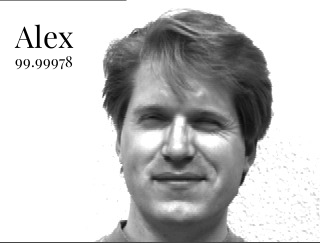

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Bob
---------------------------------------------
---------------------
{'Bob': [99.9999, 99.9995, 99.9995, 99.9996, 99.9996, 99.9994, 99.99931, 99.9994, 99.9995, 99.9995]}
---------------------
Identified Person :  Bob   ::   Confidence :  99.99952
---------------------


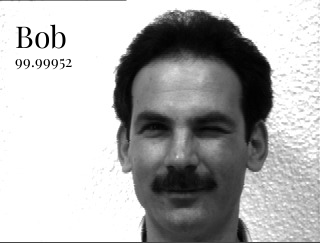

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Charlie
---------------------------------------------
---------------------
{'Charlie': [99.99979, 99.99979, 99.99979, 99.9999, 99.9994, 99.9997, 99.9997, 99.99979, 99.9997, 99.9994]}
---------------------
Identified Person :  Charlie   ::   Confidence :  99.9997
---------------------


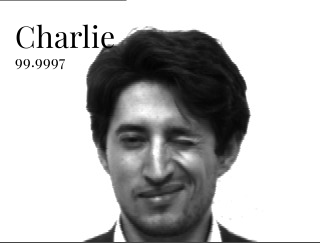

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Denis
---------------------------------------------
---------------------
{'Denis': [99.99979, 99.99979, 99.99979, 99.9999, 99.9999, 99.9999, 99.9999, 99.9997, 99.99979, 99.99979]}
---------------------
Identified Person :  Denis   ::   Confidence :  99.99983
---------------------


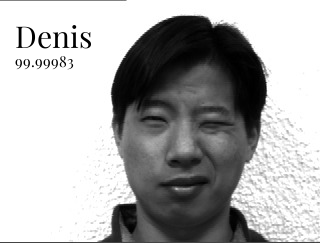

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Ellie
---------------------------------------------
---------------------
{'Ellie': [99.9996, 99.9997, 99.9997, 99.99979, 99.9997, 99.99979, 99.9995, 99.9996, 99.99979, 99.9997, 99.9996]}
---------------------
Identified Person :  Ellie   ::   Confidence :  99.99968
---------------------


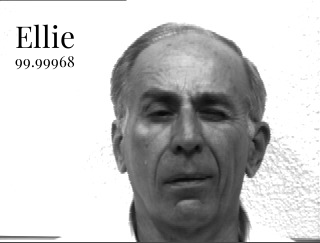

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Ferry
---------------------------------------------
---------------------
{'Ferry': [99.9999, 99.99979, 99.99979, 99.9999, 99.9999, 100.0, 99.9999, 99.9999, 100.0, 99.9999]}
---------------------
Identified Person :  Ferry   ::   Confidence :  99.9999
---------------------


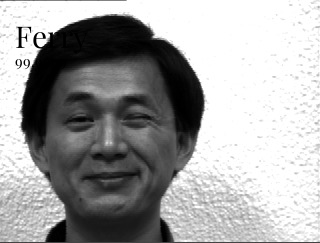

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Garry
---------------------------------------------
---------------------
{'Garry': [99.9999, 99.99979, 99.9997, 99.99979, 99.9997, 99.9997, 99.99979, 99.9992, 99.9996, 99.99979]}
---------------------
Identified Person :  Garry   ::   Confidence :  99.9997
---------------------


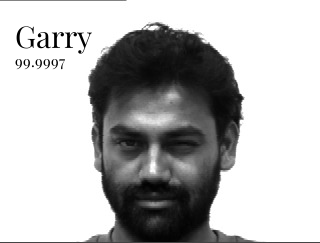

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Harry
---------------------------------------------
---------------------
{'Harry': [99.9995, 99.9995, 99.9995, 99.9997, 99.99979, 99.9996, 99.9997, 99.999, 99.9995, 99.9997]}
---------------------
Identified Person :  Harry   ::   Confidence :  99.99955
---------------------


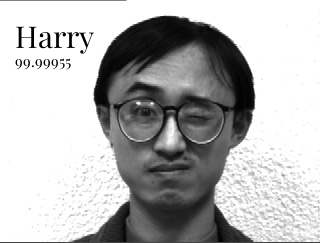

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Irina
---------------------------------------------
---------------------
{'Irina': [99.99979, 99.9997, 99.9997, 99.9995, 99.9995, 99.99931, 99.9995, 99.9995, 99.99979, 99.9997]}
---------------------
Identified Person :  Irina   ::   Confidence :  99.9996
---------------------


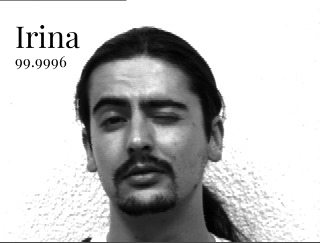

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Jerry
---------------------------------------------
---------------------
{'Jerry': [99.99979, 99.99979, 99.9996, 99.9996, 99.9997, 99.99979, 99.99979, 99.99979, 99.9999, 99.9999, 99.9997]}
---------------------
Identified Person :  Jerry   ::   Confidence :  99.99976
---------------------


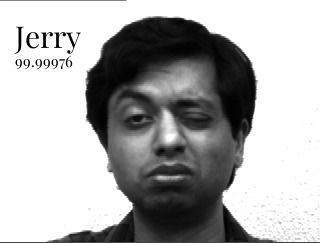

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Kim
---------------------------------------------
---------------------
{'Kim': [99.9997, 99.9997, 99.9996, 99.9995, 99.9997, 99.9995, 99.9997, 99.9995, 99.9997, 99.9996, 99.9995]}
---------------------
Identified Person :  Kim   ::   Confidence :  99.99961
---------------------


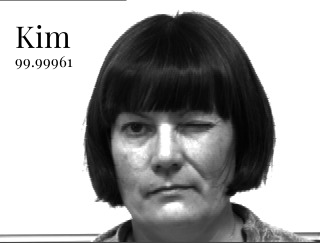

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: leo
---------------------------------------------
---------------------
{'leo': [99.9995, 99.9996, 99.9999, 99.99979, 99.9996, 99.9999, 99.9996, 99.9997, 99.9997, 99.9999]}
---------------------
Identified Person :  leo   ::   Confidence :  99.99972
---------------------


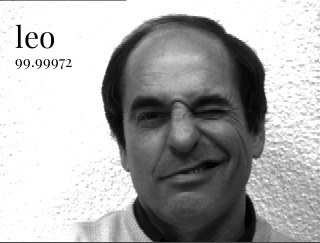

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Manny
---------------------------------------------
---------------------
{'Manny': [99.9997, 99.9997, 99.99979, 99.99979, 99.9996, 99.9997, 99.9996, 99.9995, 99.9997, 99.9988, 99.99931]}
---------------------
Identified Person :  Manny   ::   Confidence :  99.99956
---------------------


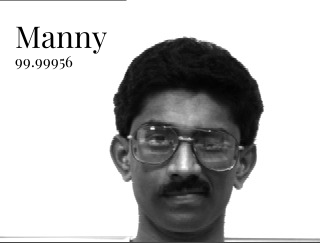

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: Ned
---------------------------------------------
---------------------
{'Ned': [99.9992, 99.9995, 99.99931, 99.9992, 99.9997, 99.9992, 99.9996, 99.9996, 99.9995, 99.9995]}
---------------------
Identified Person :  Ned   ::   Confidence :  99.99943
---------------------


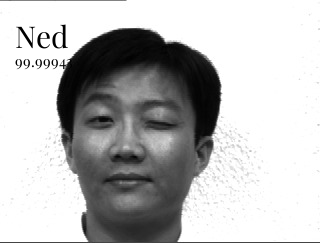

####################################################
####################################################
---------------------------------------------
Actual Image of the Person :: oxam
---------------------------------------------
---------------------
{'oxam': [99.9997, 99.99979, 99.99979, 99.99979, 99.99979, 99.9999, 99.9999, 99.9997, 99.9995, 99.99979, 99.99979]}
---------------------
Identified Person :  oxam   ::   Confidence :  99.99977
---------------------


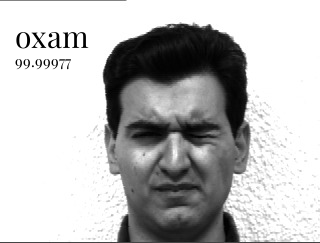

####################################################


In [18]:
firstImageTest=True
for imageTest in imagesTest:
    print('####################################################')
    personNameConfidences = {}
    print('---------------------------------------------')
    print('Actual Image of the Person :: ' + imageTest[1] )
    print('---------------------------------------------')
    imageLoaded = Image.open('Images\\'+imageTest[0])
    #display(imageLoaded)
    #stream = io.BytesIO()
    #imageLoaded.save(stream,format="JPEG")
    #image_binary = stream.getvalue()

    response = rekognition.search_faces_by_image(
            CollectionId=collectionName,
            Image={"S3Object":
            {"Bucket": bucket,
            "Name": imageTest[0]}},                                      
            )
    
    for match in response['FaceMatches']:
        facePrintID = match['Face']['FaceId']
        confidence = round(match['Face']['Confidence'], 5)
        
        face = dynamodb.get_item(
            TableName=tableName,  
            Key={'RekognitionId': {'S': match['Face']['FaceId']}}
            )
        
        if 'Item' in face:
            personName = face['Item']['FullName']['S']
            if personName in personNameConfidences.keys():
                personNameConfidences[personName].append(confidence)
            else:
                personNameConfidences[personName] = [confidence]
            if firstImageTest:
                
                print ('FacePrintID: ',facePrintID,'  ::  ' ,'Confidence: ' ,confidence,'  ::  ','Identified Person: ',personName )    
                print('---')
        else:
            print ('no match found in person lookup')
    print('---------------------')        
    print(personNameConfidences)
    print('---------------------') 
    firstImageTest=False
    #Fuzzy Logic
    
    identifiedPersonConfidence = {}
    for personName in personNameConfidences.keys():
        averageConfidence = round(sum(personNameConfidences[personName]) / len(personNameConfidences[personName]), 5) 
        identifiedPersonConfidence[personName]=averageConfidence
        print( 'Identified Person : ',personName, '  ::  ', 'Confidence : ', averageConfidence)
        print('---------------------')

    predictedPerson = ''
    maxConfidence = 0
    for identifiedPerson in identifiedPersonConfidence.keys():
        if identifiedPersonConfidence[identifiedPerson] > maxConfidence:
            maxConfidence = identifiedPersonConfidence[identifiedPerson]
            predictedPerson = identifiedPerson
    # Display Image        
    title_font = ImageFont.truetype('PlayfairDisplay-Regular.ttf', 30)
    confidence_font = ImageFont.truetype('PlayfairDisplay-Regular.ttf', 15) 
    image_editable = ImageDraw.Draw(imageLoaded)
    image_editable.text((15,15), predictedPerson, (0, 0, 0), font=title_font)
    image_editable.text((15,50), str(maxConfidence), (0, 0, 0), font=confidence_font)
    display(imageLoaded)
    print('####################################################')
    personNameConfidences.clear()
    identifiedPersonConfidence.clear()

In [20]:
image = Image.open("Grouped\group1.jpg")
stream = io.BytesIO()
image.save(stream,format="JPEG")
image_binary = stream.getvalue()

response = rekognition.detect_faces(
    Image={'Bytes':image_binary}                                        
        )
    
all_faces=response['FaceDetails']
    
# Initialize list object
boxes = []

# Get image diameters
image_width = image.size[0]
image_height = image.size[1]
   
# Crop face from image
for face in all_faces:
    box=face['BoundingBox']
    x1 = int(box['Left'] * image_width) * 0.9
    y1 = int(box['Top'] * image_height) * 0.9
    x2 = int(box['Left'] * image_width + box['Width'] * image_width) * 1.10
    y2 = int(box['Top'] * image_height + box['Height']  * image_height) * 1.10
    image_crop = image.crop((x1,y1,x2,y2))
    
    stream = io.BytesIO()
    image_crop.save(stream,format="JPEG")
    image_crop_binary = stream.getvalue()

    # Submit individually cropped image to Amazon Rekognition
    response = rekognition.search_faces_by_image(
            CollectionId=collectionName,
            Image={'Bytes':image_crop_binary}                                       
            )
    
    if len(response['FaceMatches']) > 0:
        # Return results
        print ('Coordinates ', box)
        for match in response['FaceMatches']:
                
            face = dynamodb.get_item(
                TableName=tableName,               
                Key={'RekognitionId': {'S': match['Face']['FaceId']}}
                )
    
            if 'Item' in face:
                person = face['Item']['FullName']['S']
            else:
                person = 'no match found'
            
            print (match['Face']['FaceId'],match['Face']['Confidence'],person)

Coordinates  {'Width': 0.12533129751682281, 'Height': 0.6637213826179504, 'Left': 0.12116976827383041, 'Top': 0.2408585250377655}
b76df279-485c-4313-9e9c-5fe1617d25af 99.9999008178711 Alex
6ed12299-ccaa-4319-8eef-c4270c687929 99.99979400634766 Alex
ef0aca54-7ac0-4304-a478-a82c42aa0ba4 99.99960327148438 Alex
be0deea4-73fc-4d5c-980b-5508b1d366d1 99.99970245361328 Alex
79ebe18e-6b8f-4fc8-8fad-201a816cd461 99.99979400634766 Alex
cb55379e-8dbc-453d-bea2-95287f928bae 99.99970245361328 Alex
57c65dca-7dbd-4aee-9998-453016c944b2 99.9999008178711 Alex
d216d139-41dc-4eda-9670-5fb4971ed230 99.99979400634766 Alex
66134b17-7f8d-46b3-8d14-0659cc53ecd2 99.99979400634766 Alex
e37f431f-3360-4e99-8151-641760697cc3 99.99979400634766 Alex
c436421c-ceca-464f-9c93-874f1cf2fc7a 99.99979400634766 Alex
Coordinates  {'Width': 0.11760370433330536, 'Height': 0.6962652206420898, 'Left': 0.46571895480155945, 'Top': 0.238130122423172}
09cc786e-7c4a-4f46-8570-5480def51609 99.99949645996094 Bob
aa76c73c-93b5-43fd-8fe2-